In [74]:
import pandas as pd
import numpy as np

In [75]:
# Import and asses dataset
# Dataset description can be found at: https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv
df = pd.read_csv("../data/mexico_government_covid19_patient/covid.csv")
print(df.shape)
df.head()

(566602, 23)


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [76]:
# Change the data died column to indicate if patient death
# If there is a valid date then patient death and represent as 1 otherwise represent as 2
df['date_died'] = df['date_died'].replace(to_replace="9999-99-99", value=2)
df['date_died'] = df['date_died'].mask(df['date_died'].ne(2), 1)
df = df.rename(columns={'date_died':'death'})
df.head()

,id,sex,patient_type,entry_date,date_symptoms,death,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,2,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,2,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,2,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,2,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [77]:
# With date_symptoms and entry_date we can calculate time between disease contraction and medical attention
# This would be a more relevant feature to use rather than just the dates
df['days_to_medical_help'] = (pd.to_datetime(df['entry_date'], dayfirst=True) - pd.to_datetime(df['date_symptoms'], dayfirst=True)).dt.days
df = df.drop(columns=['entry_date', 'date_symptoms'])
df.head()

,id,sex,patient_type,death,intubed,pneumonia,age,pregnancy,diabetes,copd,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,days_to_medical_help
0,16169f,2,1,2,97,2,27,97,2,2,...,2,2,2,2,2,2,2,1,97,2
1,1009bf,2,1,2,97,2,24,97,2,2,...,2,2,2,2,2,2,99,1,97,2
2,167386,1,2,2,2,2,54,2,2,2,...,2,2,2,1,2,2,99,1,2,5
3,0b5948,2,2,2,2,1,30,97,2,2,...,2,2,2,2,2,2,99,1,2,7
4,0d01b5,1,2,1,2,2,60,2,1,2,...,1,2,1,2,2,2,99,1,2,0


In [78]:
# Drop Patient ID from the dataset since it won't help in predictions
columns_to_drop = ['id']
df = df.drop(columns=columns_to_drop)

In [79]:
# Check data types of all features
df.dtypes

sex                      int64
patient_type             int64
death                   object
intubed                  int64
pneumonia                int64
age                      int64
pregnancy                int64
diabetes                 int64
copd                     int64
asthma                   int64
inmsupr                  int64
hypertension             int64
other_disease            int64
cardiovascular           int64
obesity                  int64
renal_chronic            int64
tobacco                  int64
contact_other_covid      int64
covid_res                int64
icu                      int64
days_to_medical_help     int64
dtype: object

In [80]:
# Since most categorical features are currently int64 change them to categorical
categorical_features = ['sex', 'patient_type',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'death']
# The dataset indicates that missing values are 97, 98, 99 so we replace them with 0 for uniformity
# Keep in mind the feature values are 1- Yes, 2 - No So changing missing values to 0 is alright
for feature in categorical_features:
    df[feature] = df[feature].replace(to_replace=[97, 98, 99], value=0).astype('category')

In [81]:
# Now we can only use observations in which the individual tested postive for COVID 19
covid_cases = df[df['covid_res'] == 1]
covid_cases.shape

(220657, 21)

In [82]:
# Encoding of 3 for 'covid_res' is supposed to be awaiting results so we can use these as the prediction set for risk assesment
awaiting_cases = df[df['covid_res'] == 3]
awaiting_cases.shape

(66910, 21)

In [83]:
# Variables to store the outcomes and features
# We could try combining icu and death
# However we do not want to include either in the prediction for the other due to expected high dependency
features = ['sex', 'patient_type', 'days_to_medical_help',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco']
outcomes = ['icu', 'death']

In [84]:
# First we train a model to predict 'icu' for that we form a dataset of known icu cases i.e Yes or No so we remove 0s which were
# supposed to be missing values or cases in which we do not know if the individual was in the icu
current_outcome = outcomes[0] # i.e 'icu'
icu_res_known = covid_cases[covid_cases['icu'] != 0]
icu_res_known.shape

(68210, 21)

In [85]:
# Split data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(icu_res_known, shuffle=True, test_size=0.3, stratify=icu_res_known['icu'])

<AxesSubplot:xlabel='icu', ylabel='count'>

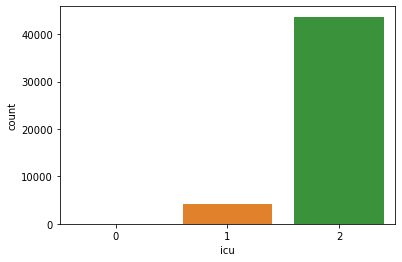

In [86]:
# Before we train we want to check the distribution of icu in the train set to ensure proper training
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='icu', data=train)

In [87]:
# The above graph indicates that the data is highly biased so we must perform some sampling to balance the dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Over Sample the Minority Label to be 0.3 in proportion
over = SMOTE(sampling_strategy=0.3)
# Down Sample the Majority Label so that there are twice as many as minority
under = RandomUnderSampler(sampling_strategy=0.5)
# Pipeline to combine 
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# Sampled data
obs, results = pipeline.fit_resample(train[features], train['icu'])

In [88]:
# Check if sampling has given the desired results
len(results[results == 1]), len(results[results == 2])

(13101, 26202)

In [89]:
# Train Random Forest as a baseline model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
rf = RandomForestClassifier(n_estimators=40, max_depth=10).fit(obs, results)
print("Accuracy: {}".format(rf.score(test[features], test['icu'])))
metrics = precision_recall_fscore_support(test['icu'], rf.predict(test[features]))
print("Precision: {}\nRecall: {}\nF-Score: {}".format(metrics[0], metrics[1], metrics[2]))

Accuracy: 0.9179983384645458
Precision: [0.51861846 0.95776464]
Recall: [0.55008586 0.95234024]
F-Score: [0.53388889 0.95504474]


In [90]:
# Let us test for the non sampled dataset
rf_normal = RandomForestClassifier(n_estimators=40, max_depth=10).fit(train[features], train['icu'])
print("Accuracy: {}".format(rf_normal.score(test[features], test['icu'])))
metrics_normal = precision_recall_fscore_support(test['icu'], rf_normal.predict(test[features]))
print("Precision: {}\nRecall: {}\nF-Score: {}".format(metrics_normal[0], metrics_normal[1], metrics_normal[2]))

Accuracy: 0.9183404192933587
Precision: [0.6        0.92436389]
Recall: [0.13050944 0.99187861]
F-Score: [0.21438646 0.95693188]


In [91]:
# Lets repeat the procedure for "death" risk prediciton but with a function since that might help with the API implementation
def checkBinaryBalance(data, features, output, negative_label=0, positive_label=1):
    data_arr = np.array(data[output])
    if abs(data_arr[data_arr == negative_label].shape[0] / len(data) - data_arr[data_arr == positive_label].shape[0] / len(data_arr)) > 0.4:
        print("Not Balanced returning sampled dataet.")
        # Over Sample the Minority Label to be 0.3 in proportion
        over = SMOTE(sampling_strategy=0.3)
        # Down Sample the Majority Label so that there are twice as many as minority
        under = RandomUnderSampler(sampling_strategy=0.5)
        # Pipeline to combine 
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        # Sampled data
        obs, results = pipeline.fit_resample(data[features], data_arr)
        return obs, results
    print("Balanced dataset returning original.")
    obs = data[features]
    results = data_arr
    return obs, results

def randomForestEvaluation(obs, results, test_obs, test_results):
    rf = RandomForestClassifier(n_estimators=40, max_depth=10).fit(obs, results)
    print("Accuracy: {}".format(rf.score(test_obs, test_results)))
    metrics = precision_recall_fscore_support(test_results, rf.predict(test_obs))
    print("Precision: {}\nRecall: {}\nF-Score: {}".format(metrics[0], metrics[1], metrics[2]))

In [92]:
# Form dataset with only death status known
death_res_known = covid_cases[covid_cases['death'] != 0]
death_res_known.shape

(220657, 21)

In [93]:
# Form train test
train, test = train_test_split(death_res_known, shuffle=True, test_size=0.3, stratify=death_res_known['death'])

In [94]:
# Check if the resutls are balanced and get obs, results which are balanced
obs, results = checkBinaryBalance(train, features, 'death', 2, 1)

Not Balanced returning sampled dataet.


In [95]:
# Evaluate Random Forest on training from the sampled dataset
randomForestEvaluation(obs, results, test[features], test['death'])

Accuracy: 0.8270038369739267
Precision: [0.40244763 0.97365961]
Recall: [0.84070796 0.82508353]
F-Score: [0.54432596 0.89323538]


In [96]:
# Evaluate Rnadom forest on training form the original dataset
randomForestEvaluation(train[features], train['death'], test[features], test['death'])

Accuracy: 0.8895132783467778
Precision: [0.64699571 0.9002082 ]
Recall: [0.22234513 0.98300093]
F-Score: [0.33095499 0.93978463]


In [97]:
# Now that we have trained on Random Forest Let us test the baselines for all classifiers within the sklearn library
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    #KNeighborsClassifier(2),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=20),
    MLPClassifier(max_iter=10000),
    AdaBoostClassifier(),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
]

"""names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]"""
names = ["Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

def allModelEvaluation(names, classifiers, obs, results, test_obs, test_results):
    scores = {}
    for name, clf in zip(names, classifiers):
        print("Training " + name)
        clf.fit(obs, results)
        train_score =  clf.score(obs, results)
        metrics_train = precision_recall_fscore_support(results, clf.predict(obs))
        test_score = clf.score(test_obs, test_results)
        metrics_test = precision_recall_fscore_support(test_results, clf.predict(test_obs))
        print("Train Accuracy: {}".format(train_score))
        print("Train Precision: {}\nTrain Recall: {}\nTrain F-Score: {}\n".format(metrics_train[0], metrics_train[1], metrics_train[2]))
        print("Test Accuracy: {}".format(test_score))
        print("Test Precision: {}\nTest Recall: {}\nTest F-Score: {}".format(metrics_test[0], metrics_test[1], metrics_test[2]))
        scores[name] = {'test accuracy' : test_score, 'test precision' : metrics_test[0], 'test recall': metrics_test[1], 'train accuracy' : train_score, 'train precision' : metrics_train[0], 'train recall' : metrics_train[1]}
        print("-----------")
    return scores

In [98]:
sampled_death_scores = allModelEvaluation(names, classifiers, obs, results, test[features], test['death'])

Training Decision Tree
Train Accuracy: 0.8565195282384397
Train Precision: [0.73872778 0.93427646]
Train Recall: [0.88123124 0.84416367]
Train F-Score: [0.80371168 0.88693708]

Test Accuracy: 0.8212936946735551
Test Precision: [0.38795195 0.96497968]
Test Recall: [0.78601278 0.82623747]
Test F-Score: [0.51949634 0.8902353 ]
-----------
Training Random Forest
Train Accuracy: 0.8561422502173449
Train Precision: [0.74169317 0.92992419]
Train Recall: [0.87217657 0.84812509]
Train F-Score: [0.80166    0.88714306]

Test Accuracy: 0.8247983322758996
Test Precision: [0.39325358 0.96480733]
Test Recall: [0.78380039 0.83054321]
Test F-Score: [0.52373522 0.89265484]
-----------
Training Neural Net
Train Accuracy: 0.8343093351705133
Train Precision: [0.70903215 0.9181751 ]
Train Recall: [0.85295999 0.82498401]
Train F-Score: [0.77436505 0.86908851]

Test Accuracy: 0.8265053324873863
Test Precision: [0.40150579 0.97337236]
Test Recall: [0.83898722 0.82475629]
Test F-Score: [0.54310379 0.89292274]
-

In [99]:
# Evaluate all models for "icu"
# Form train test
train, test = train_test_split(icu_res_known, shuffle=True, test_size=0.3, stratify=icu_res_known['icu'])
# Check if the resutls are balanced and get obs, results which are balanced
obs, results = checkBinaryBalance(train, features, 'icu', 2, 1)
sampled_death_scores = allModelEvaluation(names, classifiers, obs, results, test[features], test['icu'])

Not Balanced returning sampled dataet.
Training Decision Tree
Train Accuracy: 0.8461186168994733
Train Precision: [0.85037258 0.84465422]
Train Recall: [0.65330891 0.94252347]
Train F-Score: [0.73892774 0.89090909]

Test Accuracy: 0.8889703367052729
Test Precision: [0.3889124  0.95425414]
Test Recall: [0.52604465 0.92284676]
Test F-Score: [0.44720195 0.9382877 ]
-----------
Training Random Forest
Train Accuracy: 0.8458387400452891
Train Precision: [0.85870008 0.8415573 ]
Train Recall: [0.643386   0.94706511]
Train F-Score: [0.73561112 0.89119934]

Test Accuracy: 0.8976689634950887
Test Precision: [0.42037632 0.95455043]
Test Recall: [0.52432742 0.93251763]
Test F-Score: [0.46663271 0.94340541]
-----------
Training Neural Net
Train Accuracy: 0.8195557591023586
Train Precision: [0.83581089 0.81476479]
Train Recall: [0.57079612 0.94393558]
Train F-Score: [0.67833817 0.8746066 ]

Test Accuracy: 0.9112055905781166
Test Precision: [0.48263889 0.95804196]
Test Recall: [0.55695478 0.94427228]


In [36]:
# Based on the above results we can gauge that _____ is the best model. So let us try running hyperparemeter optimization on it
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
calibrated_forest = CalibratedClassifierCV(
   base_estimator=RandomForestClassifier())
param_grid = {
   'base_estimator__max_depth': [20, 40, 60, 80, 100, 120],
    'base_estimator__n_estimators': [10, 50, 100, 150, 200]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(obs, results)

print("Accuracy: {}".format(search.score(test[features], test['icu'])))
metrics = precision_recall_fscore_support(test['icu'], search.predict(test[features]))
print("Precision: {}\nRecall: {}\nF-Score: {}".format(metrics[0], metrics[1], metrics[2]))

Accuracy: 0.8975223574255974
Precision: [0.42052679 0.9550408 ]
Recall: [0.53005152 0.93182304]
F-Score: [0.46897949 0.94328907]


In [109]:
# Let us now train on a Dense Model in Keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [110]:
# Tensorflow by default uses 0 as the negative label and 1 as the positive label so let us first change the positive lables
# which are currently 2 to 0
# Check if the resutls are balanced and get obs, results which are balanced
obs, results = checkBinaryBalance(train, features, 'icu', 2, 1)
# Change 2 labels to 0
results = np.where(results==2, 0, results) 
# Change 2 labels to 0 in test
test_results = test['icu'].copy()
test_results = np.where(test_results==2, 0, test_results)

Not Balanced returning sampled dataet.


In [111]:
# Build a Fully Connected Model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=16))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 17        
Total params: 3,713
Trainable params: 3,713
Non-trainable params: 0
___________________________________________________

In [112]:
# Model Checkpoints
# Callback to Early Stop if Validation loss is not improving
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# Callback to Keep storing best model
mc = ModelCheckpoint("best.h5", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [113]:
test_obs, validation_obs, test_res, validation_res = train_test_split(test[features], test_results, test_size=0.5, shuffle=True, stratify=test_results)

In [114]:
# Fit the model using training data with validation using a subset of the test data
model_train_data = model.fit(obs, results, validation_data=(validation_obs, validation_res), epochs=100, batch_size=32, shuffle=True, callbacks=[es, mc])

Epoch 1/100
1178/1229 [===========================>..] - ETA: 0s - loss: 0.5358 - accuracy: 0.7569
Epoch 00001: val_accuracy improved from -inf to 0.91487, saving model to best.h5
1229/1229 [==============================] - 1s 970us/step - loss: 0.5330 - accuracy: 0.7594 - val_loss: 0.3105 - val_accuracy: 0.9149
Epoch 2/100
1185/1229 [===========================>..] - ETA: 0s - loss: 0.4784 - accuracy: 0.8111
Epoch 00002: val_accuracy did not improve from 0.91487
1229/1229 [==============================] - 1s 831us/step - loss: 0.4776 - accuracy: 0.8117 - val_loss: 0.3557 - val_accuracy: 0.9130
Epoch 3/100
1200/1229 [============================>.] - ETA: 0s - loss: 0.4726 - accuracy: 0.8150
Epoch 00003: val_accuracy did not improve from 0.91487
1229/1229 [==============================] - 1s 822us/step - loss: 0.4730 - accuracy: 0.8146 - val_loss: 0.3205 - val_accuracy: 0.9141
Epoch 4/100
1179/1229 [===========================>..] - ETA: 0s - loss: 0.4702 - accuracy: 0.8148
Epoch 00

In [115]:
# Load Best Model Weights and Evaluate Model on entire test set
model.load_weights("best.h5") 
model.evaluate(test[features], test_results)

640/640 [==============================] - 0s 428us/step - loss: 0.3087 - accuracy: 0.9160


[0.3087095022201538, 0.9160435795783997]

In [116]:
# Evaluate Model on subset of test set
model.evaluate(test_obs, test_res)

320/320 [==============================] - 0s 450us/step - loss: 0.3069 - accuracy: 0.9172


[0.30693984031677246, 0.9172123670578003]

In [123]:
# Precision, Recall, F-score metrics for entire test set
preds = model.predict(test[features])
labels = []
for pred in preds[:, 0]:
    if pred > 0.5:
        labels.append(1)
    else:
        labels.append(0)
metrics = precision_recall_fscore_support(test_results, labels)
print("Precision: {}\nRecall: {}\nF-Score: {}".format(metrics[0], metrics[1], metrics[2]))

Precision: [0.95668995 0.50782515]
Recall: [0.95127164 0.53863766]
F-Score: [0.9539731  0.52277778]


In [124]:
# Precision, Recall, F-score metrics for subset of test set
preds = model.predict(test_obs)
labels_test = []
for pred in preds[:, 0]:
    if pred > 0.5:
        labels_test.append(1)
    else:
        labels_test.append(0)
metrics = precision_recall_fscore_support(test_res, labels_test)
print("Precision: {}\nRecall: {}\nF-Score: {}".format(metrics[0], metrics[1], metrics[2]))

Precision: [0.95713825 0.51409978]
Recall: [0.95212652 0.54295533]
F-Score: [0.95462581 0.5281337 ]
